In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Data Importing and split
df = pd.read_csv("train.csv")

# Problem 1 : Predicting CentralAir using SalePrice

In [89]:
X = pd.DataFrame(df['SalePrice'])
y = pd.DataFrame(df['CentralAir'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create a Decision Tree Classifier object
dectree_2 = DecisionTreeClassifier(max_depth = 2)

dectree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = Yes'),
 Text(0.25, 0.5, 'SalePrice <= 76250.0\ngini = 0.479\nsamples = 113\nvalue = [45, 68]\nclass = Yes'),
 Text(0.125, 0.16666666666666666, 'gini = 0.32\nsamples = 15\nvalue = [12, 3]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'gini = 0.447\nsamples = 98\nvalue = [33, 65]\nclass = Yes'),
 Text(0.75, 0.5, 'SalePrice <= 137950.0\ngini = 0.065\nsamples = 982\nvalue = [33, 949]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'gini = 0.185\nsamples = 223\nvalue = [23, 200]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'gini = 0.026\nsamples = 759\nvalue = [10, 749]\nclass = Yes')]

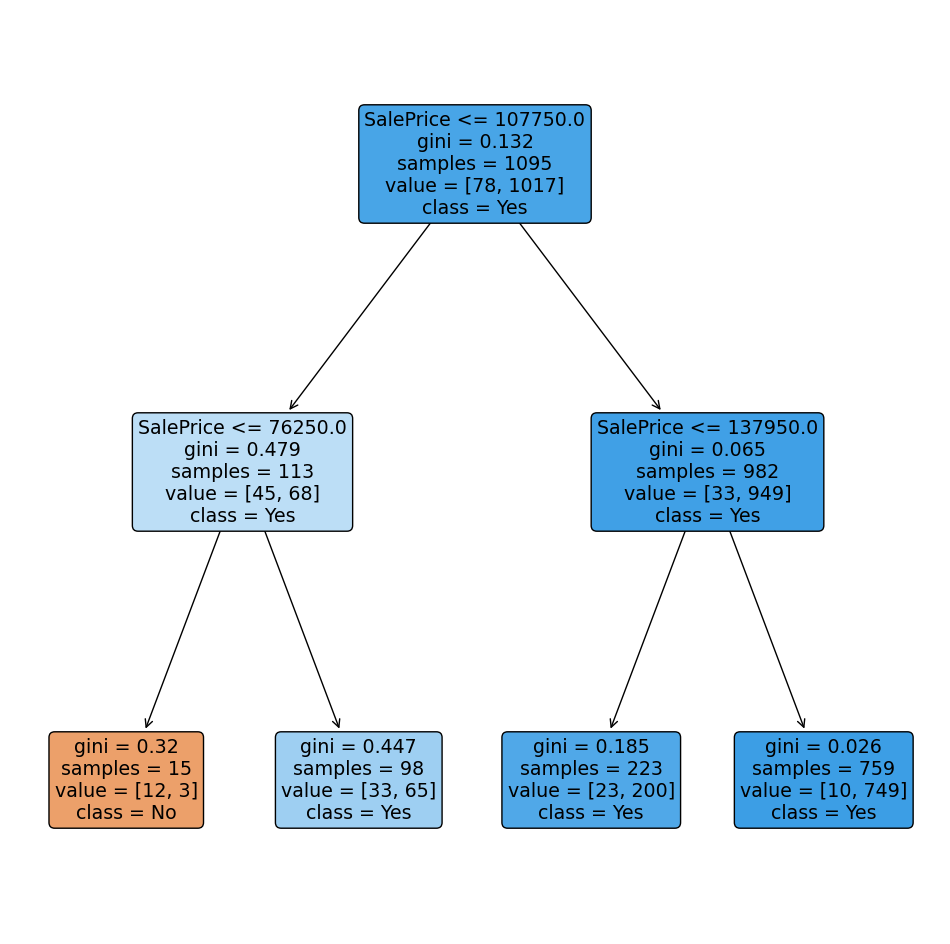

In [94]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No", "Yes"])

In [8]:
# Create a Decision Tree Classifier object
dectree_4 = DecisionTreeClassifier(max_depth = 4)

dectree_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.48, 0.9, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = Yes'),
 Text(0.22, 0.7, 'SalePrice <= 76250.0\ngini = 0.479\nsamples = 113\nvalue = [45, 68]\nclass = Yes'),
 Text(0.08, 0.5, 'SalePrice <= 45650.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]\nclass = No'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = No'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.16, 0.1, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = No'),
 Text(0.36, 0.5, 'SalePrice <= 106125.0\ngini = 0.447\nsamples = 98\nvalue = [33, 65]\nclass = Yes'),
 Text(0.28, 0.3, 'SalePrice <= 98150.0\ngini = 0.426\nsamples = 91\nvalue = [28, 63]\nclass = Yes'),
 Text(0.24, 0.1, 'gini = 0.464\nsamples = 63\nvalue = [23, 40]\nclass = Yes'),
 Text(0.32, 0.1, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]\nclass = Yes'),
 Text(0.44, 0

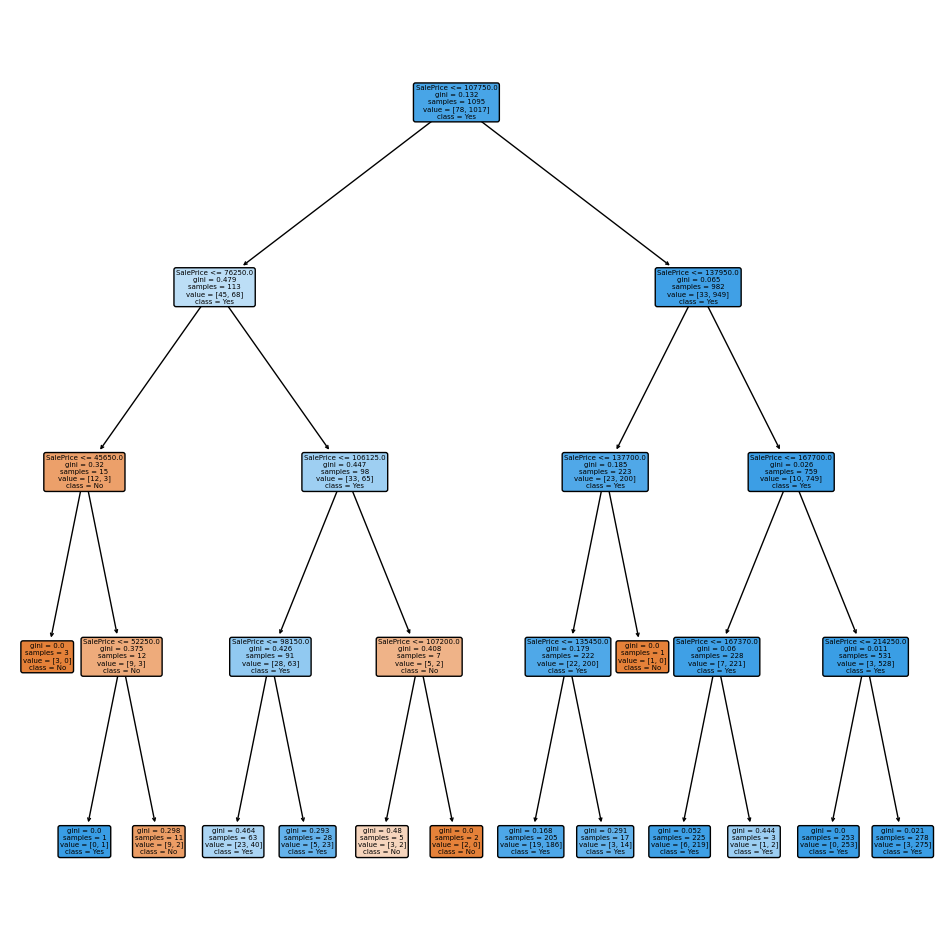

In [111]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree_4, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["No","Yes"], fontsize=5)

In [112]:
# Predict Legendary corresponding to Total Train
y_train_pred = dectree_2.predict(X_train)
y_test_pred = dectree_2.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

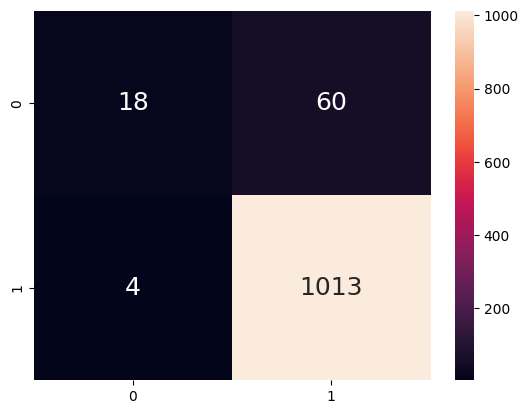

In [55]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [56]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Classification Accuracy:", dectree_2.score(X_train, y_train))
print("True Positive Rate: ", TP/(FN + TP))
print("False Positive Rate: ", FP/(FP + TN))

Classification Accuracy: 0.936986301369863
True Positive Rate:  0.9960668633235005
False Positive Rate:  0.7692307692307693


<AxesSubplot:>

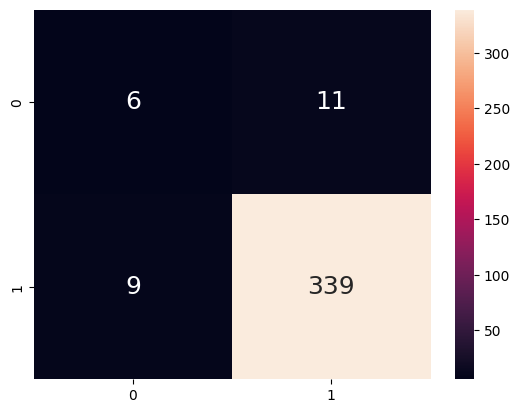

In [57]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [58]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Classification Accuracy:", dectree_2.score(X_test, y_test))
print("True Positive Rate: ", TP/(FN + TP))
print("False Positive Rate: ", FP/(FP + TN))

Classification Accuracy: 0.9534246575342465
True Positive Rate:  0.9741379310344828
False Positive Rate:  0.6470588235294118


In [59]:
# Predict Legendary corresponding to Total Test
y_train_pred = dectree_4.predict(X_train)
y_test_pred = dectree_4.predict(X_test)

<AxesSubplot:>

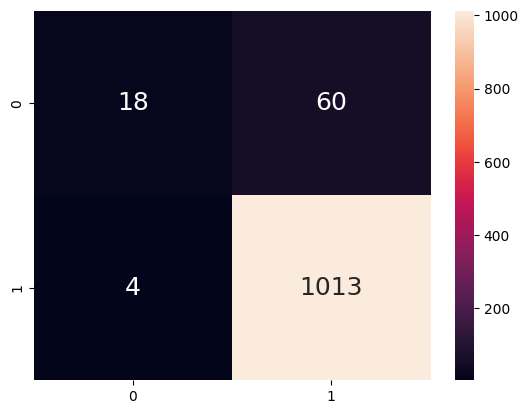

In [60]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [61]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Classification Accuracy:", dectree_4.score(X_train, y_train))
print("True Positive Rate: ", TP/(FN + TP))
print("False Positive Rate: ", FP/(FP + TN))

Classification Accuracy: 0.9415525114155251
True Positive Rate:  0.9960668633235005
False Positive Rate:  0.7692307692307693


<AxesSubplot:>

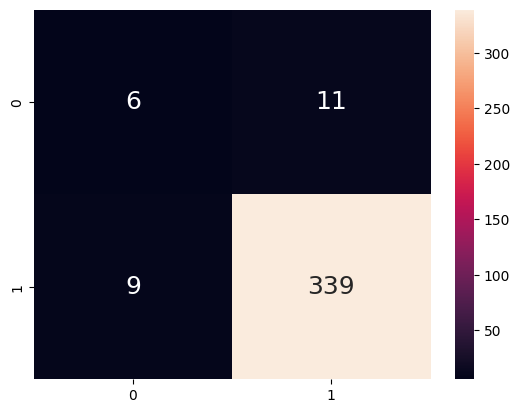

In [62]:
# Plot the two-way Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [63]:
# Print the Classification Accuracy
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

print("Classification Accuracy:", dectree_4.score(X_test, y_test))
print("True Positive Rate: ", TP/(FN + TP))
print("False Positive Rate: ", FP/(FP + TN))

Classification Accuracy: 0.9452054794520548
True Positive Rate:  0.9741379310344828
False Positive Rate:  0.6470588235294118


Model 2 is better. Higher classification accuracy (0.9452054794520548).

# Problem 2 : Predicting CentralAir using Other Variables

In [14]:
OverallQual = pd.DataFrame(df['OverallQual'])
YearBuilt = pd.DataFrame(df['YearBuilt'])
y = pd.DataFrame(df['CentralAir'])

OverallQual_X_train, OverallQual_X_test, OverallQual_y_train, OverallQual_y_test = train_test_split(OverallQual, y, random_state=42)

In [86]:
OverallQual = pd.DataFrame(df['OverallQual'])
YearBuilt = pd.DataFrame(df['YearBuilt'])
y = pd.DataFrame(df['CentralAir'])

OverallQual_X_train, OverallQual_X_test, OverallQual_y_train, OverallQual_y_test = train_test_split(OverallQual, y, random_state=42)

In [68]:
def classification(var):
  X = pd.DataFrame(df[var])
  y = pd.DataFrame(df['CentralAir'])

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  # Create a Decision Tree Classifier object
  dectree = DecisionTreeClassifier(max_depth = 4)

  dectree.fit(X_train, y_train)

  f, axes = plt.subplots(3, figsize=(12, 12))
  plot_tree(dectree, filled=True, rounded=True, 
            feature_names=["CentralAir"], 
            class_names=["No","Yes"],
            ax=axes[0]
            )

  # Predict Legendary corresponding to Total Train
  y_train_pred = dectree.predict(X_train)

  # Plot the two-way Confusion Matrix
  cm = confusion_matrix(y_train, y_train_pred)
  sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1]).set(title="Train")

  # Print the Classification Accuracy
  TP = cm[1][1]
  FP = cm[0][1]
  TN = cm[0][0]
  FN = cm[1][0]
  print("Train")
  print("Classification Accuracy:", dectree.score(X_train, y_train))
  print("True Positive Rate: ", TP/(FN + TP))
  print("False Positive Rate: ", FP/(FP + TN))

  print("------------------------")
  # Predict Legendary corresponding to Total Train
  y_test_pred = dectree.predict(X_test)

  # Plot the two-way Confusion Matrix
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[2]).set(title="Test")

  # Print the Classification Accuracy
  TP = cm[1][1]
  FP = cm[0][1]
  TN = cm[0][0]
  FN = cm[1][0]

  print("Test")
  print("Classification Accuracy:", dectree.score(X_test, y_test))
  print("True Positive Rate: ", TP/(FN + TP))
  print("False Positive Rate: ", FP/(FP + TN))

Train
Classification Accuracy: 0.9315068493150684
True Positive Rate:  1.0
False Positive Rate:  0.9615384615384616
------------------------
Test
Classification Accuracy: 0.958904109589041
True Positive Rate:  1.0
False Positive Rate:  0.8823529411764706


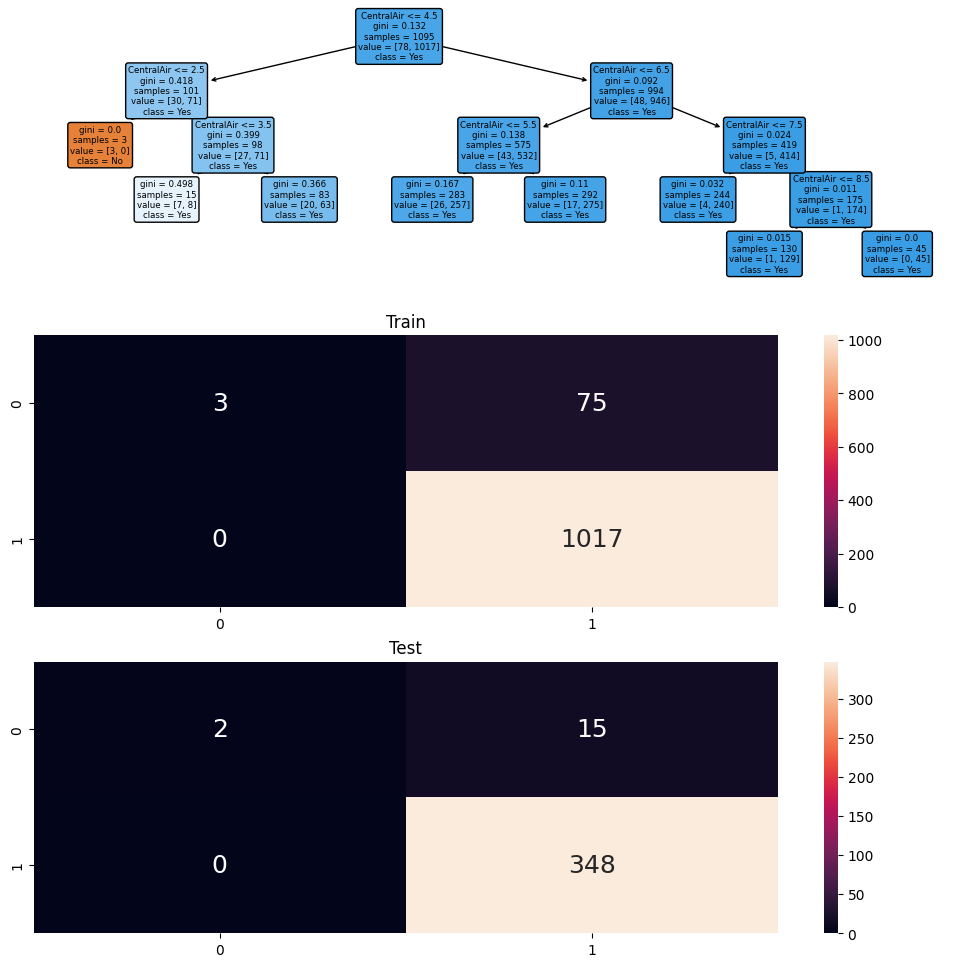

In [69]:
classification("OverallQual")

Train
Classification Accuracy: 0.9351598173515981
True Positive Rate:  0.9862340216322517
False Positive Rate:  0.7307692307692307
------------------------
Test
Classification Accuracy: 0.936986301369863
True Positive Rate:  0.9798850574712644
False Positive Rate:  0.9411764705882353


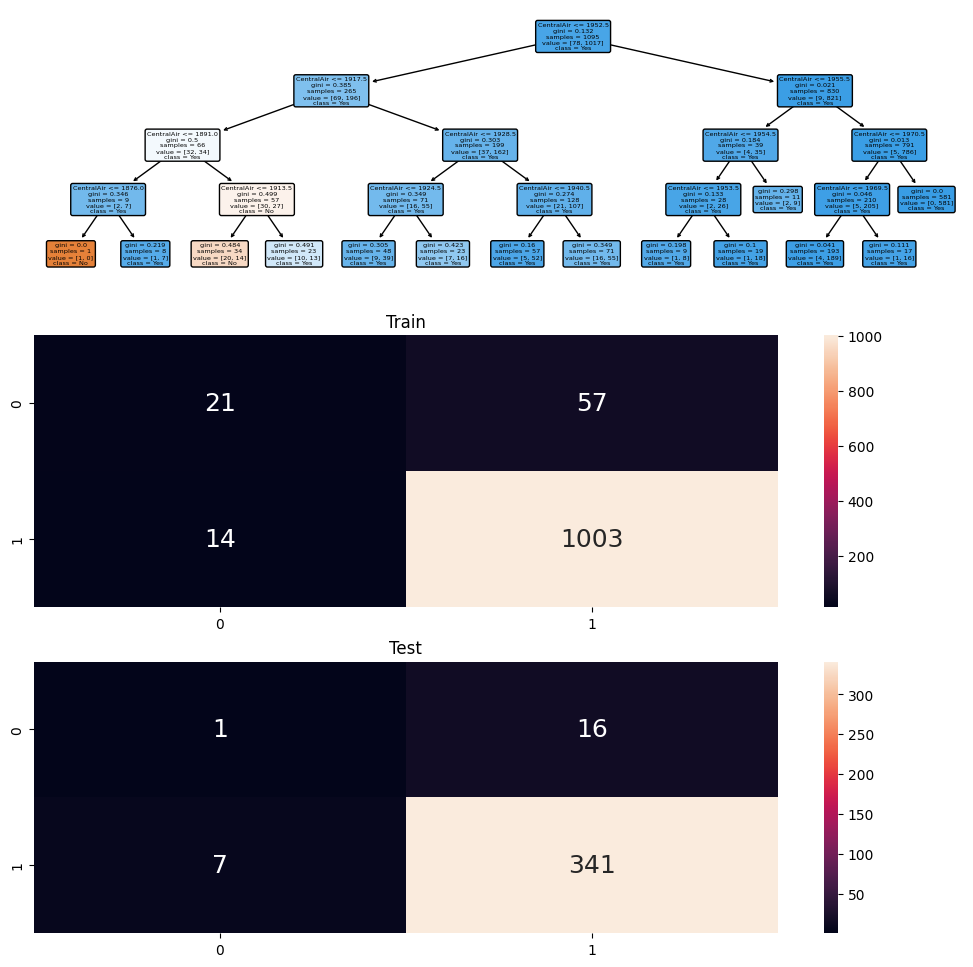

In [70]:
classification("YearBuilt")

# Problem 3 : Understanding the Misclassified Samples

[Text(0.48, 0.9, 'SalePrice <= 107750.0\ngini = 0.132\nsamples = 1095\nvalue = [78, 1017]\nclass = Yes'),
 Text(0.22, 0.7, 'SalePrice <= 76250.0\ngini = 0.479\nsamples = 113\nvalue = [45, 68]\nclass = Yes'),
 Text(0.08, 0.5, 'SalePrice <= 45650.0\ngini = 0.32\nsamples = 15\nvalue = [12, 3]\nclass = No'),
 Text(0.04, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.12, 0.3, 'SalePrice <= 52250.0\ngini = 0.375\nsamples = 12\nvalue = [9, 3]\nclass = No'),
 Text(0.08, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.16, 0.1, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]\nclass = No'),
 Text(0.36, 0.5, 'SalePrice <= 106125.0\ngini = 0.447\nsamples = 98\nvalue = [33, 65]\nclass = Yes'),
 Text(0.28, 0.3, 'SalePrice <= 98150.0\ngini = 0.426\nsamples = 91\nvalue = [28, 63]\nclass = Yes'),
 Text(0.24, 0.1, 'gini = 0.464\nsamples = 63\nvalue = [23, 40]\nclass = Yes'),
 Text(0.32, 0.1, 'gini = 0.293\nsamples = 28\nvalue = [5, 23]\nclass = Yes'),
 Text(0.44, 0

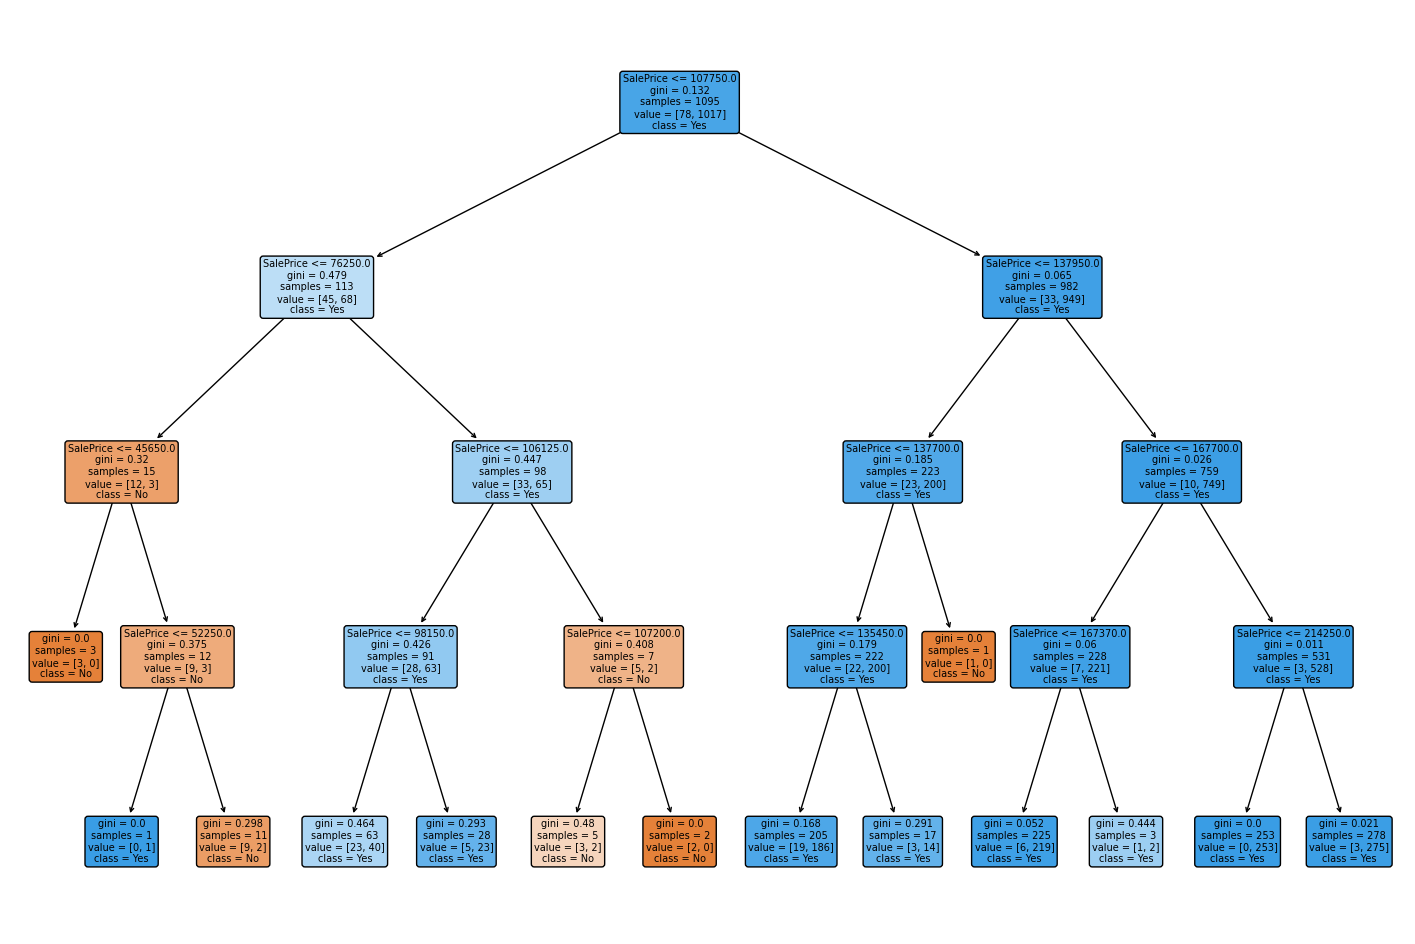

In [83]:
f = plt.figure(figsize=(18,12))
plot_tree(dectree_4, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["No","Yes"], fontsize=7)

3rd Leaf Node from the left has the highest number of False Positives.

In [136]:
# Retrieve indexes of leaf node
indexes = X_train[(X_train["SalePrice"] > 76250) & (X_train["SalePrice"] <= 98150)].index
indexes

Int64Index([ 430, 1323, 1013,  438,  308,  352,  287,   88, 1376,  325,   39,
             242, 1035,  976,  307,   97,  434, 1007,  235, 1179,  676,  223,
             250, 1022, 1453,  329, 1144, 1000,  386,  637,  125, 1412, 1326,
             912, 1219,  750,   68,   75,  232,  341, 1090,  456, 1039,  431,
             696,  655,  935, 1062,  489,   17,  127, 1218, 1072,  658,  749,
            1186,  821, 1143, 1378,  632, 1038,   98, 1086],
           dtype='int64')

In [137]:
# Samples from the dataframe that ended up in the leaf node
df.loc[indexes]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
430,431,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,COD,Abnorml,85400
1323,1324,30,RL,50.0,5330,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,82500
1013,1014,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,85000
438,439,30,RL,40.0,4280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,90350
308,309,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,82500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,83000
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Family,82500
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,97000
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [138]:
misclassified_df = y_train.copy()

In [139]:
misclassified_df["CentralAir_Preds"] = y_train_pred

In [149]:
misclassified_indexes = misclassified_df.loc[indexes][(misclassified_df["CentralAir_Preds"] == "Y") & (misclassified_df["CentralAir"] == "N")].index
misclassified_indexes

/var/folders/4s/r_bvbp111_jd36z2wncv0gk40000gn/T/ipykernel_37870/657699322.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  misclassified_indexes = misclassified_df.loc[indexes][(misclassified_df["CentralAir_Preds"] == "Y") & (misclassified_df["CentralAir"] == "N")].index


Int64Index([1013,  438,  352,   88, 1376,  325,   39,  242, 1035,  676,  329,
            1144, 1000,  125, 1412,  912, 1090,  456, 1062, 1218,  749,  821,
              98],
           dtype='int64')

In [150]:
# False Positive Cases
df.loc[misclassified_indexes]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1013,1014,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,85000
438,439,30,RL,40.0,4280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Normal,90350
352,353,50,RL,60.0,9084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,ConLw,Normal,95000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
1376,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,91000
325,326,45,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,87000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
242,243,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,79000
1035,1036,20,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,84000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
